In [1]:
# Works best with jupyter-notebook

In [100]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import roboticstoolbox as rtb
import spatialmath.base.symbolic as sym
import math
from spatialmath import *
from spatialmath.base import *
from collections import namedtuple
import roboticstoolbox.tools.trajectory as tr
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

##### Lecture 6.3

A 2-joint planar robot
(ETS in 2D)

Evaluate an ETS with joint coordinate substitution:
eval(self, q=None, unit='rad')

In [49]:
#import 2-joint planar robot model
robot = rtb.models.DH.Planar2()
print(robot)

┏━━━━┳━━━━━┳━━━━┳━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ ┃  ⍺ⱼ  ┃
┣━━━━╋━━━━━╋━━━━╋━━━━━━┫
┃ q1 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┃ q2 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┗━━━━┻━━━━━┻━━━━┻━━━━━━┛

┌─────┬──────┬──────┐
│name │ q0   │ q1   │
├─────┼──────┼──────┤
│  qz │  0°  │  0°  │
│  q1 │  0°  │  90° │
│  q2 │  90° │ -90° │
└─────┴──────┴──────┘



In [68]:
#Create the workspace variables a1 and q1; these variables represent the links length and joint angle
from roboticstoolbox import ETS2 as E2

# unit in radians
a1=1
a2=1
q1=0.2
q2=0.3
robot.addconfiguration("q", [q1, q2])
#To create a homogenous transformation matrix that represents the 2-joint robots end effectors pose
#Provide the chain of transformations as a string and the joint angle in which we are interested.
e=E2.r(q1)*E2.tx(a1)*E2.r(q2)*E2.tx(a2)
print(e)
e.eval(robot.q)

R(11.46°) * tx(1) * R(17.19°) * tx(1)


SE3:   0.877583   -0.479426    1.85765      
       0.479426    0.877583    0.678095     
       0           0           1            
    

In [77]:
q = sym.symbol('q1, q2')# q = (q_1, q_2)
print(q)
l = sym.symbol('a1, a2')# q = (a_1, a_2)
print(l)
e=E2.r(q1)*E2.tx(a1)*E2.r(q2)*E2.tx(a2)
print(e)
e.T=SE2(a1)

(q1, q2)
(a1, a2)
R(11.46°) * tx(1) * R(17.19°) * tx(1)


In [105]:
#To create a symbolic representation of the homogenous transformation matrix
a1 = sym.symbol('a1')
q1 = sym.symbol('q1')
a2 = sym.symbol('a2')
q2 = sym.symbol('q2')
e=E2.r(q1)*E2.tx(a1)*E2.r(q2)*E2.tx(a2)
print(e)
T1=trot2(q1)
print(T1)
T3=transl2(a1,a2)
print(T3)

R(q1) * tx(a1) * R(q2) * tx(a2)
[[cos(q1) -sin(q1) 0]
 [sin(q1) cos(q1) 0]
 [0 0 1.0]]
None


<IPython.core.display.Javascript object>


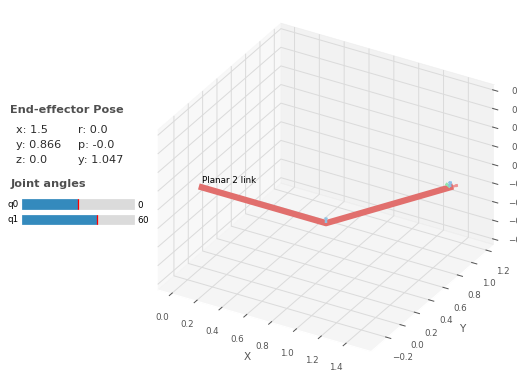

In [111]:
#illed code here
#import a planar one joint robot model
#mdl_planar1
robot.q=[0, np.pi/2]
e = robot.teach()

<IPython.core.display.Javascript object>


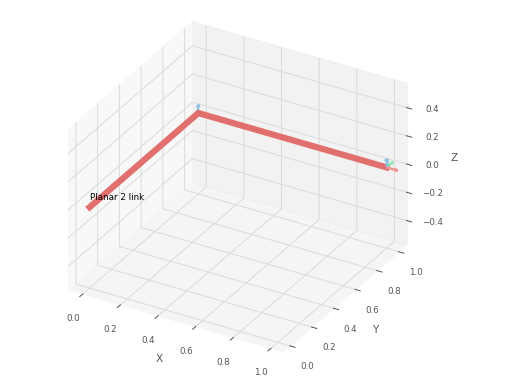

In [107]:
robot.q2=[np.pi/2, -np.pi/2]
#e = robot.teach()
robot.plot(robot.q2)